In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

/Users/markpotanin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [3]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
__________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 46s 1ms/step - loss: 1.7447 - acc: 0.3856 - val_loss: 1.4103 - val_acc: 0.5191
Epoch 2/20
40000/40000 [==============================] - 48s 1ms/step - loss: 1.3776 - acc: 0.5100 - val_loss: 1.3328 - val_acc: 0.5358
Epoch 3/20
40000/40000 [==============================] - 46s 1ms/step - loss: 1.2510 - acc: 0.5613 - val_loss: 1.3054 - val_acc: 0.5377
Epoch 4/20
40000/40000 [==============================] - 51s 1ms/step - loss: 1.1594 - acc: 0.5918 - val_loss: 1.1286 - val_acc: 0.6081
Epoch 5/20
40000/40000 [==============================] - 50s 1ms/step - loss: 1.0900 - acc: 0.6184 - val_loss: 1.1684 - val_acc: 0.5940
Epoch 6/20
40000/40000 [==============================] - 49s 1ms/step - loss: 1.0306 - acc: 0.6380 - val_loss: 1.0745 - val_acc: 0.6284
Epoch 7/20
40000/40000 [==============================] - 49s 1ms/step - loss: 0.9829 - acc: 0.6581 - val_loss: 1.1017 - val_acc

In [13]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
10000/10000 [==============================] - 3s 341us/step

Test score: 1.009338303565979
Test accuracy: 0.6793


In [14]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


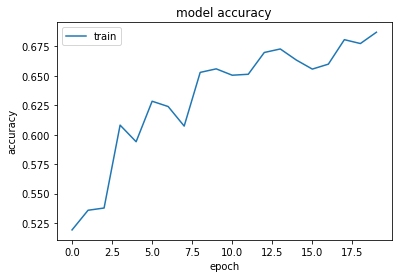

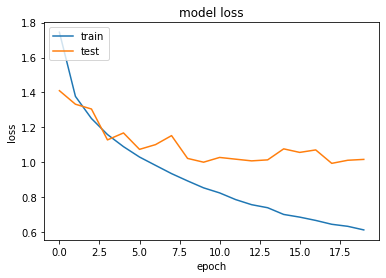

In [16]:
print(history.history.keys())
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LeNet

In [ ]:
model = Sequential()
# CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=5, padding="same",
    input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# CONV => RELU => POOL
model.add(Conv2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# a softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

# VGG

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())

#top layer of the VGG net
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))